In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('error_kws.csv')

In [4]:
df

,No,Part,Trouble,Key_word,Umbrella,noise
0,1.0,Tool magazine (Umbrella type),Noise for tool changing,"Umbrella, noise, change",1/5,1/4
1,NaN,NaN,Can't change the tool,"Umbrella, change, tool",1/5,0
2,NaN,NaN,Tool number in chaos,"Umbrella, tool, number, chaos",1/5,0
3,NaN,NaN,Tool magazine keep rotation,"Umbrella, rotation",1/5,0
4,NaN,NaN,Tool magazine not drawing back,"Umbrella, tool, magazine, draw, back",1/5,0
5,2.0,Tool magazine (Arm type),Noise for tool changing,"Arm, noise, tool, change",0,1/4
6,NaN,NaN,can't change to tool,"Arm, change, tool",0,0
7,NaN,NaN,tool magazine not drawing back,"Arm, tool, magazine, draw, back",0,0
8,3.0,Axis Trouble,over limited,"Axis, limit",0,0
9,NaN,NaN,can't back to zero,"axis, zero",0,0


In [14]:
key_words = {}

In [21]:
df['Key_word'][0].split(', ')

['Umbrella', 'noise', 'change']

In [23]:
for index, row in df.iterrows():
    for w in row['Key_word'].split(', '):
        if w in key_words:
            key_words[w].add(row['Trouble'])
        else:
            key_words[w] = {row['Trouble']}
key_words

{'Umbrella': {"Can't change the tool",
  'Noise for tool changing',
  'Tool magazine keep rotation',
  'Tool magazine not drawing back',
  'Tool number in chaos'},
 'noise': {'Noise for tool changing', 'noise for axis ', 'spindle noise'},
 'change': {"Can't change the tool",
  'Noise for tool changing',
  "can't change to tool"},
 'tool': {"Can't change the tool",
  'Noise for tool changing',
  'Tool magazine not drawing back',
  'Tool number in chaos',
  "can't change to tool",
  'cannot find the tool number ',
  'tcode = spindle tool',
  'tool collets cannot go down',
  'tool collets cannot go upward',
  'tool is not clamp well',
  'tool magazine is not positioned and could not get the sensor signal ',
  'tool magazine not drawing back',
  'tool unclamp '},
 'number': {'Tool number in chaos', 'cannot find the tool number '},
 'chaos': {'Tool number in chaos'},
 'rotation': {'Tool magazine keep rotation'},
 'magazine': {'Tool magazine not drawing back',
  'tool magazine not drawing ba

In [49]:
p_mat = pd.DataFrame({e: [0]*len(key_words) for e in df['Trouble']}, dtype=float)

In [50]:
p_mat.index = [w for w in key_words]

In [51]:
p_mat['Noise for tool changing']['noise']

0.0

In [52]:
len(key_words['noise'])

3

In [53]:
for w in key_words:
    for e in key_words[w]:
        p_mat[e][w] = 1/len(key_words[w])

In [54]:
p_mat['Noise for tool changing']

Umbrella       0.200000
noise          0.333333
change         0.333333
tool           0.076923
number         0.000000
chaos          0.000000
rotation       0.000000
magazine       0.000000
draw           0.000000
back           0.000000
Arm            0.333333
Axis           0.000000
limit          0.000000
axis           0.000000
zero           0.000000
spindle        0.000000
coolant        0.000000
pump           0.000000
drain          0.000000
lubrication    0.000000
trouble        0.000000
position       0.000000
sensor         0.000000
signal         0.000000
find           0.000000
pot            0.000000
collects       0.000000
down           0.000000
arm            0.000000
90             0.000000
error          0.000000
unclamp        0.000000
270            0.000000
up             0.000000
upwards        0.000000
jog            0.000000
mode           0.000000
clamp          0.000000
home           0.000000
pos            0.000000
point          0.000000
atc            0

In [55]:
p_mat

,Noise for tool changing,Can't change the tool,Tool number in chaos,Tool magazine keep rotation,Tool magazine not drawing back,can't change to tool,tool magazine not drawing back,over limited,can't back to zero,noise for axis,...,tool unclamp,arm 270 degree error,tool collets cannot go upward,arm jog mode error,tool is not clamp well,arm home point error,atc limit error,tcode = spindle tool,door is not close,the 4th axis is not clamp
Umbrella,0.200000,0.200000,0.200000,0.2,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
noise,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
change,0.333333,0.333333,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
tool,0.076923,0.076923,0.076923,0.0,0.076923,0.076923,0.076923,0.0,0.000000,0.000000,...,0.076923,0.000000,0.076923,0.00,0.076923,0.00,0.000000,0.076923,0.0,0.000000
number,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
chaos,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
rotation,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
magazine,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
draw,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000
back,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000


In [56]:
import seaborn as sns

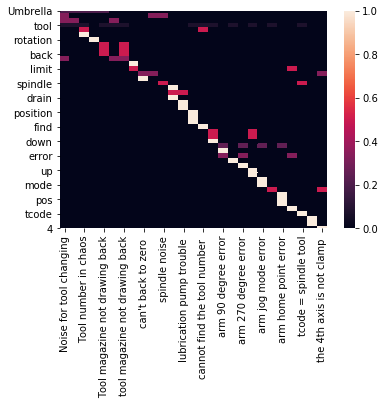

In [58]:
hm = sns.heatmap(p_mat)

In [59]:
df.to_csv('word_error_mat.csv')